<a href="https://colab.research.google.com/github/VaishnaviP04/test/blob/main/Vaishnavi_P_proj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
path_2015 = "/content/drive/MyDrive/vaish/2015-building-energy-benchmarking.csv"

In [88]:
 
df_2015 = pd.read_csv(path_2015)

In [89]:
df_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [90]:
df_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [91]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [92]:
df_2015.shape

(3340, 47)

In [93]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [94]:
missing = df_2015.isna().sum().sort_values(ascending = False)
missing

Comment                                                          3327
Outlier                                                          3256
YearsENERGYSTARCertified                                         3230
City Council Districts                                           3127
2010 Census Tracts                                               3116
ThirdLargestPropertyUseTypeGFA                                   2780
ThirdLargestPropertyUseType                                      2780
SecondLargestPropertyUseTypeGFA                                  1781
SecondLargestPropertyUseType                                     1781
ENERGYSTARScore                                                   780
LargestPropertyUseTypeGFA                                         136
LargestPropertyUseType                                            136
ListOfAllPropertyUseTypes                                         127
SiteEnergyUse(kBtu)                                                10
SiteEUI(kBtu/sf)    

***dropping missing values***

In [95]:
drop = ['OSEBuildingID','Comment','Outlier','YearBuilt','YearsENERGYSTARCertified','DataYear','City Council Districts','2010 Census Tracts','Zip Codes','CouncilDistrictCode','Neighborhood','ComplianceStatus','ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','TaxParcelIdentificationNumber','Location','SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType']

In [96]:
df1 = df_2015.drop(drop,axis = 1)
df1.reset_index(inplace = True)

### **replacing missing values with mean and mode**

In [97]:
df1["SiteEUIWN(kBtu/sf)"].fillna(df_2015["SiteEUIWN(kBtu/sf)"].mean(),inplace =True)
df1["LargestPropertyUseTypeGFA"].fillna(df_2015["LargestPropertyUseTypeGFA"].mean(),inplace = True)
df1['ENERGYSTARScore'].fillna(df_2015['ENERGYSTARScore'].mean(),inplace = True)
df1['LargestPropertyUseType'].fillna(df_2015['LargestPropertyUseType'].mode(),inplace = True)
df1['ListOfAllPropertyUseTypes'].fillna(df_2015['ListOfAllPropertyUseTypes'].mode(),inplace = True)

In [98]:
missing_values = df1.isnull().sum()
missing_values

index                                                              0
BuildingType                                                       0
PrimaryPropertyType                                                0
PropertyName                                                       0
NumberofBuildings                                                  0
NumberofFloors                                                     8
PropertyGFATotal                                                   0
PropertyGFAParking                                                 0
PropertyGFABuilding(s)                                             0
ListOfAllPropertyUseTypes                                        127
LargestPropertyUseType                                           136
LargestPropertyUseTypeGFA                                          0
ENERGYSTARScore                                                    0
SiteEUI(kBtu/sf)                                                  10
SiteEUIWN(kBtu/sf)                

### **plotting graphs**

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

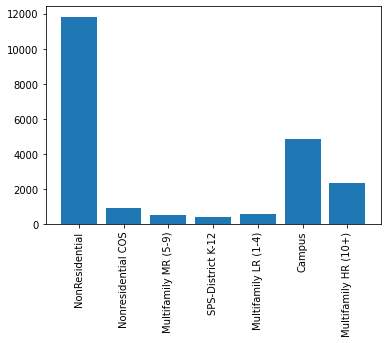

In [99]:
x = df1['BuildingType']
y = df1['GHGEmissions(MetricTonsCO2e)']
plt.bar(x,y)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text major ticklabel objects>)

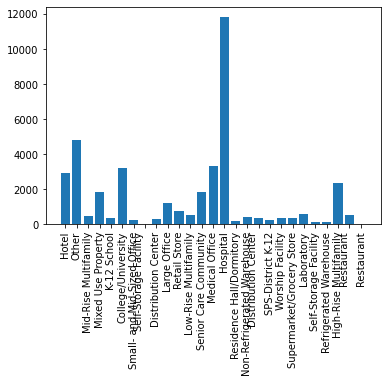

In [100]:
x = df1['PrimaryPropertyType']
y = df1['GHGEmissions(MetricTonsCO2e)']
plt.bar(x,y)
plt.xticks(rotation = 90)

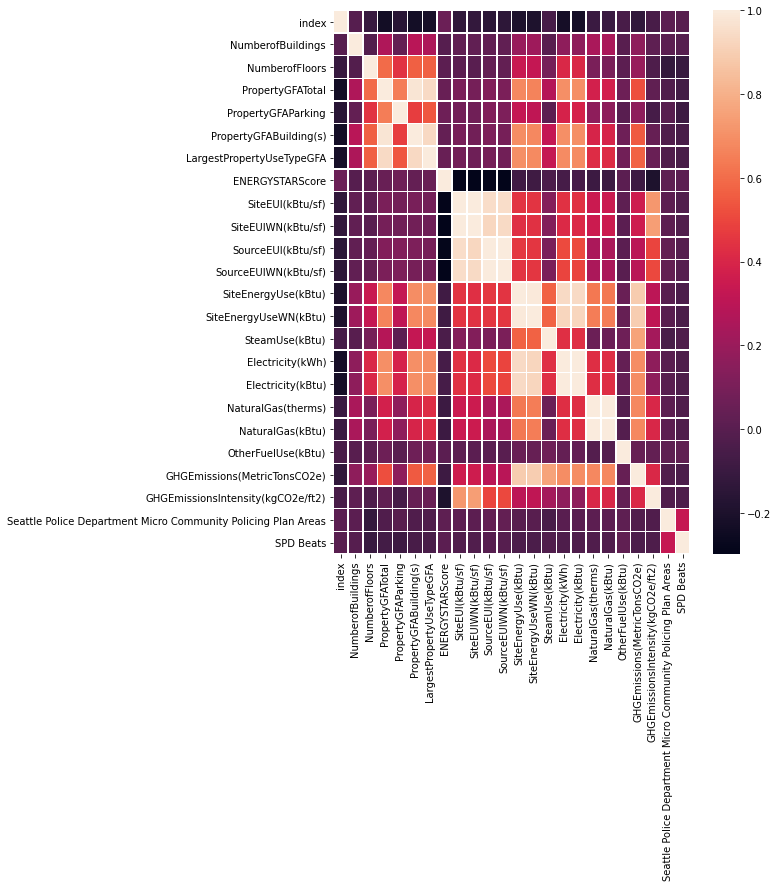

In [101]:
cor = df1.corr()
plt.figure(figsize=(8, 10))
df = sns.heatmap(cor , linewidths=.5 , annot_kws={"fontsize":10})

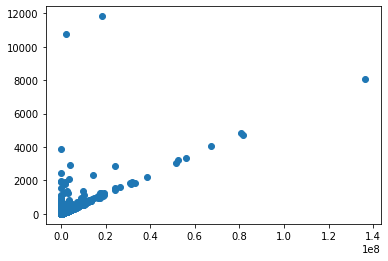

In [102]:
x = df1['NaturalGas(kBtu)']
y = df1['GHGEmissions(MetricTonsCO2e)']
plt.scatter(x,y)

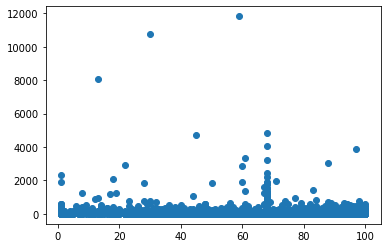

In [103]:
x = df1['ENERGYSTARScore']
y = df1['GHGEmissions(MetricTonsCO2e)']
plt.scatter(x,y)


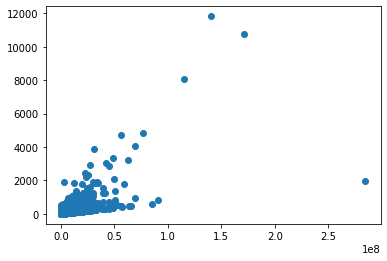

In [104]:
x = df1['Electricity(kBtu)']
y = df1['GHGEmissions(MetricTonsCO2e)']
plt.scatter(x,y)

### **Label encoder**

In [105]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['BuildingType']= label_encoder.fit_transform(df_2015['BuildingType']) 
  
df1['BuildingType'].unique()

array([4, 5, 3, 6, 2, 0, 1])

### **Droping infinite values**

In [106]:

# Replacing infinite with nan 
df1.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df1.dropna(inplace=True) 
  
# Printing df 
df1

,index,BuildingType,PrimaryPropertyType,PropertyName,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,0,4,Hotel,MAYFLOWER PARK HOTEL,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,14.0,31.0
1,1,4,Hotel,PARAMOUNT HOTEL,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,14.0,31.0
2,2,4,Hotel,WESTIN HOTEL,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,56.0,31.0
3,3,4,Hotel,HOTEL MAX,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,56.0,31.0
4,4,4,Hotel,WARWICK SEATTLE HOTEL,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,56.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,3334,4,Mixed Use Property,Salmon Bay Marine Center West,1,2.0,25532,0,25532,"Office, Repair Services (Vehicle, Shoe, Locksm...",Office,11745.0,84.0,26.8,29.1,84.0,91.3,628609.0,682675.0,0.0,184235.0,628635.0,0.0,0.0,0.0,4.38,0.07,No,33.0,27.0
3335,3335,2,Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,26.0,16.0
3336,3336,3,Mid-Rise Multifamily,IDENTITY APTS 4123,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,60.0,38.0
3338,3338,2,Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,1,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,44.0,34.8,38.1,109.4,119.5,777064.0,849250.0,0.0,227744.0,777096.0,0.0,0.0,0.0,5.42,0.04,No,55.0,48.0


In [107]:
df1.fillna(0)

,index,BuildingType,PrimaryPropertyType,PropertyName,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,0,4,Hotel,MAYFLOWER PARK HOTEL,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,14.0,31.0
1,1,4,Hotel,PARAMOUNT HOTEL,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,14.0,31.0
2,2,4,Hotel,WESTIN HOTEL,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,56.0,31.0
3,3,4,Hotel,HOTEL MAX,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,56.0,31.0
4,4,4,Hotel,WARWICK SEATTLE HOTEL,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,56.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,3334,4,Mixed Use Property,Salmon Bay Marine Center West,1,2.0,25532,0,25532,"Office, Repair Services (Vehicle, Shoe, Locksm...",Office,11745.0,84.0,26.8,29.1,84.0,91.3,628609.0,682675.0,0.0,184235.0,628635.0,0.0,0.0,0.0,4.38,0.07,No,33.0,27.0
3335,3335,2,Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,26.0,16.0
3336,3336,3,Mid-Rise Multifamily,IDENTITY APTS 4123,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,60.0,38.0
3338,3338,2,Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,1,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,44.0,34.8,38.1,109.4,119.5,777064.0,849250.0,0.0,227744.0,777096.0,0.0,0.0,0.0,5.42,0.04,No,55.0,48.0


In [108]:
df1.head()

,index,BuildingType,PrimaryPropertyType,PropertyName,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,0,4,Hotel,MAYFLOWER PARK HOTEL,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,14.0,31.0
1,1,4,Hotel,PARAMOUNT HOTEL,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,14.0,31.0
2,2,4,Hotel,WESTIN HOTEL,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,56.0,31.0
3,3,4,Hotel,HOTEL MAX,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,56.0,31.0
4,4,4,Hotel,WARWICK SEATTLE HOTEL,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,56.0,31.0


### **selecting the necessary dtpes**

In [109]:
df1_num = df1.select_dtypes(np.number)
df1_obj = df1.select_dtypes('object')

### **Building the model**

In [110]:
X = df1_num[[ 'ENERGYSTARScore','Electricity(kBtu)','NaturalGas(kBtu)', 'OtherFuelUse(kBtu)','PropertyGFATotal', 'SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','BuildingType']]
X

,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),PropertyGFATotal,SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),BuildingType
0,65.0,3686160.0,1272388.0,0.0,88434,7097539.0,173.5,2023032.0,4
1,51.0,3905411.0,4448985.0,0.0,103566,8765788.0,191.3,0.0,4
2,18.0,49762435.0,3709900.0,0.0,961990,75506272.0,242.7,19660404.0,4
3,1.0,2769023.0,2001894.0,0.0,61320,28363444.0,636.3,23458518.0,4
4,67.0,6066245.0,8763105.0,0.0,119890,15078243.0,228.8,0.0,4
...,...,...,...,...,...,...,...,...,...
3334,84.0,628635.0,0.0,0.0,25532,682675.0,84.0,0.0,4
3335,71.0,1142996.0,0.0,0.0,44650,1240429.0,80.4,0.0,2
3336,98.0,1111352.0,431976.0,0.0,42393,1750143.0,124.2,0.0,3
3338,44.0,777096.0,0.0,0.0,48230,849250.0,109.4,0.0,2


In [111]:
y = df1_num['GHGEmissions(MetricTonsCO2e)']
y.astype(float)

0        249.43
1        263.51
2       2061.48
3       1936.34
4        507.70
         ...   
3334       4.38
3335       7.97
3336      30.69
3338       5.42
3339       6.74
Name: GHGEmissions(MetricTonsCO2e), Length: 3187, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [113]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [114]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [116]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y_pred = lr.predict(X_test)

In [118]:
lr.score(X_train,y_train)

0.9999999999057159

In [119]:
lr.score(X_test,y_test)

0.9999999999764074

In [120]:
from sklearn.metrics import r2_score

In [121]:
r2_score(y_test,y_pred)

0.9999999999764074